# Exploratory data Analysis

In [2]:
# imports Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Step 1: Load the datasets

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

## Step 2: Data Exploration

In [4]:
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

### Check for missing values

In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Check for duplicates

In [6]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())


0
0
0


## Step 3: Explore the 'Customers.csv' dataset
### Count customers by region

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<Axes: xlabel='Region', ylabel='count'>

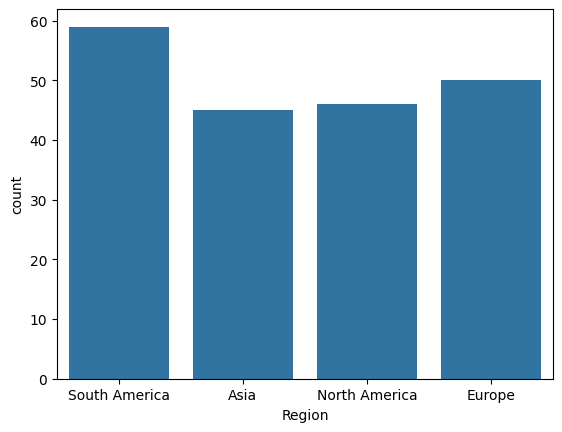

In [7]:
region_counts = customers['Region'].value_counts()
print(region_counts)
sns.countplot(data=customers, x='Region')

### Find earliest and latest SignupDate

In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
earliest_signup = customers['SignupDate'].min()
latest_signup = customers['SignupDate'].max()

print(f"Earliest Signup Date: {earliest_signup}")
print(f"Latest Signup Date: {latest_signup}")

Earliest Signup Date: 2022-01-22 00:00:00
Latest Signup Date: 2024-12-28 00:00:00


## Step 4: Explore the 'Products.csv' dataset
### Analyze product count by category

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<Axes: xlabel='Category', ylabel='count'>

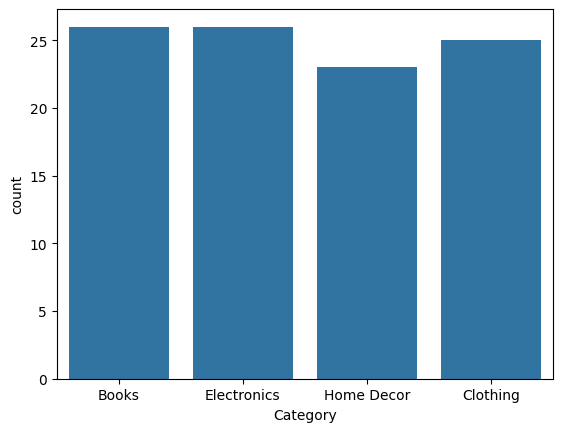

In [10]:
category_counts = products['Category'].value_counts()
print(category_counts)
sns.countplot(data=products, x='Category')

### Most and least expensive products

In [11]:
most_expensive_product = products.loc[products['Price'].idxmax()]
least_expensive_product = products.loc[products['Price'].idxmin()]

print(f"Most expensive product: {most_expensive_product['ProductName']} - ${most_expensive_product['Price']}")
print(f"Least expensive product: {least_expensive_product['ProductName']} - ${least_expensive_product['Price']}")

Most expensive product: TechPro Textbook - $497.76
Least expensive product: SoundWave Smartwatch - $16.08


## Step 5: Explore the 'Transactions.csv' dataset
### Analyze transaction dates

In [12]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transaction_range = transactions['TransactionDate'].min(), transactions['TransactionDate'].max()
print(f"Transaction Date Range: {transaction_range}")

Transaction Date Range: (Timestamp('2023-12-30 15:29:12'), Timestamp('2024-12-28 11:00:00'))


### Total sales by product

C:\Users\MANISH SAINI\AppData\Local\Temp\ipykernel_7940\397030071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


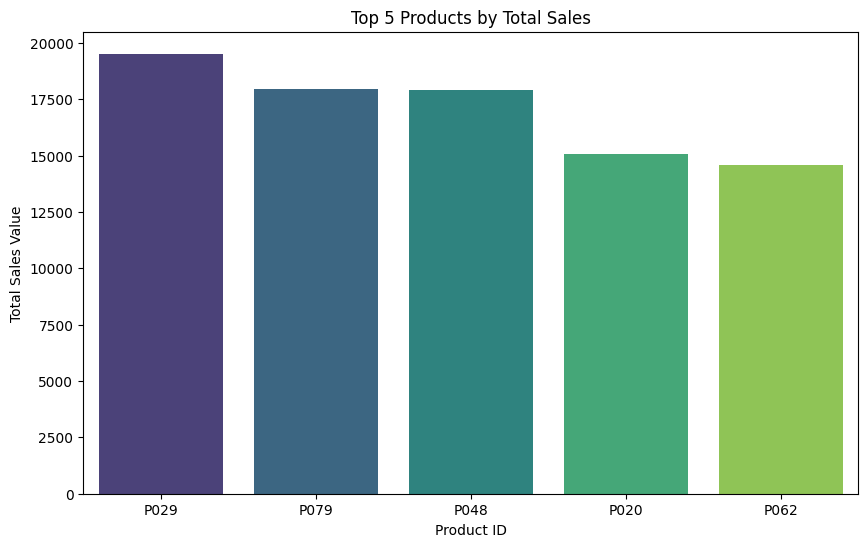

In [16]:
# Group by ProductID, calculate total sales, and sort in descending order
total_sales_by_product = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)

# Reset the index to convert Series to DataFrame for plotting
total_sales_by_product_df = total_sales_by_product.reset_index()

# Plotting the top 5 products by total sales
plt.figure(figsize=(10, 6))
sns.barplot(
    data=total_sales_by_product_df.head(5), 
    x='ProductID', 
    y='TotalValue', 
    palette='viridis'
)
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Value')
plt.show()

### Total quantity sold by product

In [18]:
total_quantity_by_product = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
print(total_quantity_by_product.head())


ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


## Step 6: Merge datasets for further analysis

In [19]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

### Top 5 high-value customers

In [20]:
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)
print(high_value_customers)

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
Name: TotalValue, dtype: float64


### Product sales trends (monthly)

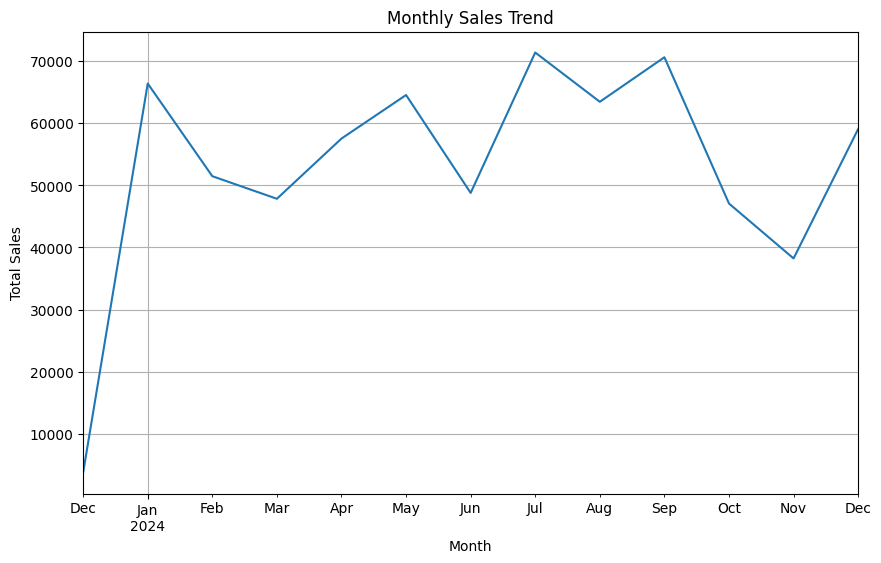

In [25]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()

#plotting
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## Step 7: Additional Visualizations
### Sales by region

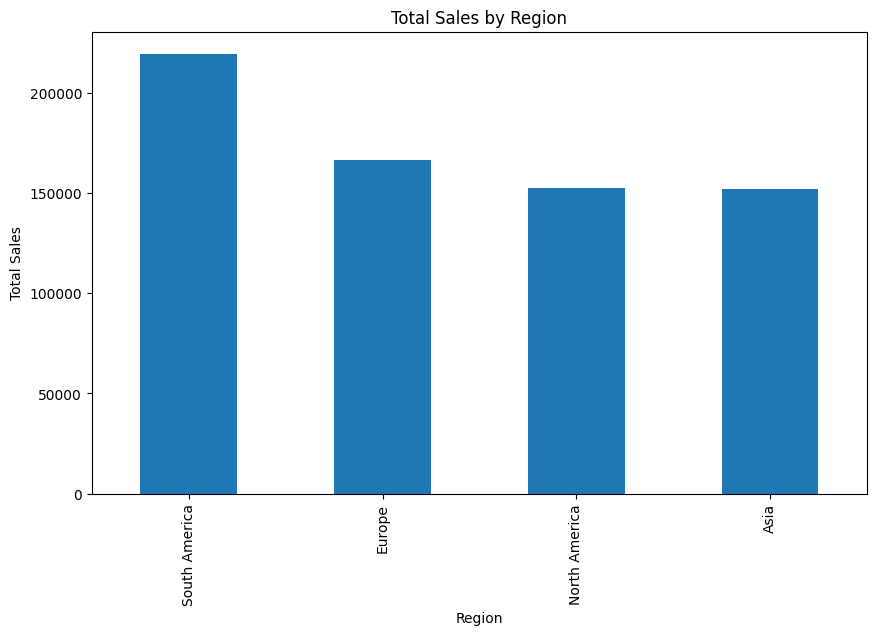

In [26]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


### Distribution of product prices

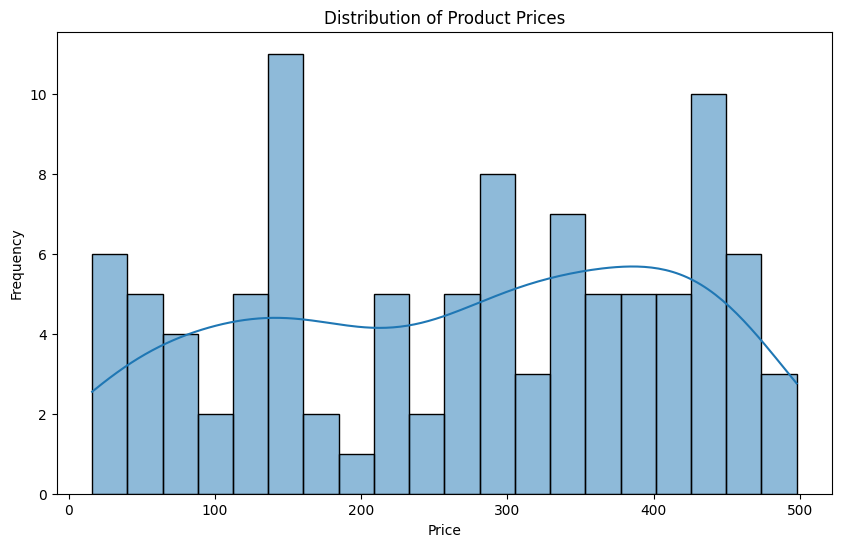

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
